In [3]:
import pandas as pd

In [155]:
df = pd.read_csv("../Data/신림 일별 시간대별 승객유형별 승하차인원.csv")
df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,08-09시간대,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,월,년
0,2022-06-01,2.0,230,신림,승차,일반,801,1198,1493,2434,...,2215,1845,1463,1432,1429,1191,512,2.0,6,2022
1,2022-06-01,2.0,230,신림,승차,어린이,0,0,0,10,...,39,38,14,10,4,1,1,0.0,6,2022
2,2022-06-01,2.0,230,신림,승차,중고생,0,1,0,0,...,1,0,1,0,1,1,0,0.0,6,2022
3,2022-06-01,2.0,230,신림,승차,청소년,9,7,17,26,...,139,108,63,76,80,73,27,0.0,6,2022
4,2022-06-01,2.0,230,신림,승차,우대권,246,251,256,282,...,338,260,213,181,125,63,26,1.0,6,2022


In [156]:
df.tail()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,06시간대이전,06-07시간대,07-08시간대,08-09시간대,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시간대이후,월,년
12375,2024-05-31,2.0,230,신림,하차,직원,3,7,7,16,...,9,16,13,4,11,8,4,11.0,5,2024
12376,2024-05-31,2.0,230,신림,하차,영어 일반,0,0,0,0,...,1,2,1,2,0,2,1,0.0,5,2024
12377,2024-05-31,2.0,230,신림,하차,일어 일반,0,0,0,0,...,0,1,0,0,0,0,2,0.0,5,2024
12378,2024-05-31,2.0,230,신림,하차,중국어 일반,0,0,0,0,...,0,11,0,0,4,0,0,0.0,5,2024
12379,2024-05-31,2.0,230,신림,하차,중국어 어린이,0,0,0,0,...,0,2,0,0,0,0,0,0.0,5,2024


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12380 entries, 0 to 12379
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   수송일자      12380 non-null  object 
 1   호선명       12380 non-null  float64
 2   역번호       12380 non-null  int64  
 3   역명        12380 non-null  object 
 4   승하차구분     12380 non-null  object 
 5   승객유형      12380 non-null  object 
 6   06시간대이전   12380 non-null  int64  
 7   06-07시간대  12380 non-null  int64  
 8   07-08시간대  12380 non-null  int64  
 9   08-09시간대  12380 non-null  int64  
 10  09-10시간대  12380 non-null  int64  
 11  10-11시간대  12380 non-null  int64  
 12  11-12시간대  12380 non-null  int64  
 13  12-13시간대  12380 non-null  int64  
 14  13-14시간대  12380 non-null  int64  
 15  14-15시간대  12380 non-null  int64  
 16  15-16시간대  12380 non-null  int64  
 17  16-17시간대  12380 non-null  int64  
 18  17-18시간대  12380 non-null  int64  
 19  18-19시간대  12380 non-null  int64  
 20  19-20시간대  12380 non-null  in

In [158]:
df.shape

(12380, 28)

In [159]:
def sumType(df, target, *add):
    print(add)
    for idx, row in df[df['승객유형'].isin(add)].iterrows():
        # 동일한 수송일자의 '일반' 승객 찾기
        general_idx = df[(df['수송일자'] == row['수송일자']) & (df['승객유형'] == target)].index
        if len(general_idx) > 0:
            # 각 시간대별 값 합하기
            for i in ['06시간대이전', '06-07시간대',
        '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
        '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
        '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시간대이후']:
                df.at[general_idx[0], i] += row[i]
            df.drop(index=idx, inplace=True)

    # 인덱스 리셋
    df.reset_index(drop=True, inplace=True)

    return df

In [160]:
df = sumType(df, '일반', '직원', '영어 일반', '일어 일반', '중국어 일반')

('직원', '영어 일반', '일어 일반', '중국어 일반')


In [161]:
df = df.melt(id_vars=['수송일자', '호선명', '역번호', '역명', '승하차구분', '승객유형', '월', '년'], 
                    var_name='시간대', 
                    value_name='승객수')

In [162]:
df

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0
...,...,...,...,...,...,...,...,...,...,...
155915,2024-05-31,2.0,230,신림,하차,어린이,5,2024,24시간대이후,0.0
155916,2024-05-31,2.0,230,신림,하차,중고생,5,2024,24시간대이후,0.0
155917,2024-05-31,2.0,230,신림,하차,청소년,5,2024,24시간대이후,16.0
155918,2024-05-31,2.0,230,신림,하차,우대권,5,2024,24시간대이후,24.0


#### 수송일자 > onject에서 datetime으로 변경

In [163]:
df['수송일자'] = pd.to_datetime(df['수송일자'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155920 entries, 0 to 155919
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   수송일자    155920 non-null  datetime64[ns]
 1   호선명     155920 non-null  float64       
 2   역번호     155920 non-null  int64         
 3   역명      155920 non-null  object        
 4   승하차구분   155920 non-null  object        
 5   승객유형    155920 non-null  object        
 6   월       155920 non-null  int64         
 7   년       155920 non-null  int64         
 8   시간대     155920 non-null  object        
 9   승객수     155920 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 11.9+ MB


#### 수송일자 컬럼을 기준으로 일과 공휴일 컬럼 추가

In [164]:
df['일'] = df['수송일자'].dt.day
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155920 entries, 0 to 155919
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   수송일자    155920 non-null  datetime64[ns]
 1   호선명     155920 non-null  float64       
 2   역번호     155920 non-null  int64         
 3   역명      155920 non-null  object        
 4   승하차구분   155920 non-null  object        
 5   승객유형    155920 non-null  object        
 6   월       155920 non-null  int64         
 7   년       155920 non-null  int64         
 8   시간대     155920 non-null  object        
 9   승객수     155920 non-null  float64       
 10  일       155920 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(4)
memory usage: 12.5+ MB


In [165]:
from holidayskr import is_holiday

# '휴일여부' 컬럼 추가
df['휴일여부'] = df['수송일자'].apply(lambda x: is_holiday(x.strftime('%Y-%m-%d')))

df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0,1,False
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0,1,False
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0,1,False
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0,1,False
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0,1,False


In [166]:
df.columns

Index(['수송일자', '호선명', '역번호', '역명', '승하차구분', '승객유형', '월', '년', '시간대', '승객수',
       '일', '휴일여부'],
      dtype='object')

#### 요일 컬럼 추가

> 요일 = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}

In [167]:
# 요일 컬럼 추가
df['요일'] = df['수송일자'].dt.dayofweek

df.head()


,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부,요일
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0,1,False,2
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0,1,False,2
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0,1,False,2
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0,1,False,2
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0,1,False,2


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155920 entries, 0 to 155919
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   수송일자    155920 non-null  datetime64[ns]
 1   호선명     155920 non-null  float64       
 2   역번호     155920 non-null  int64         
 3   역명      155920 non-null  object        
 4   승하차구분   155920 non-null  object        
 5   승객유형    155920 non-null  object        
 6   월       155920 non-null  int64         
 7   년       155920 non-null  int64         
 8   시간대     155920 non-null  object        
 9   승객수     155920 non-null  float64       
 10  일       155920 non-null  int32         
 11  휴일여부    155920 non-null  bool          
 12  요일      155920 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(2), int32(2), int64(3), object(4)
memory usage: 13.2+ MB


In [8]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

#### 요일별 평균 승객수 그래프로 확인

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 요일을 문자열로 변환
요일_매핑 = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
df['요일_문자'] = df['요일'].map(요일_매핑)

# 요일별 평균 승객수 계산
요일별_평균 = df.groupby('요일_문자')['승객수'].mean().reindex(['월', '화', '수', '목', '금', '토', '일'])


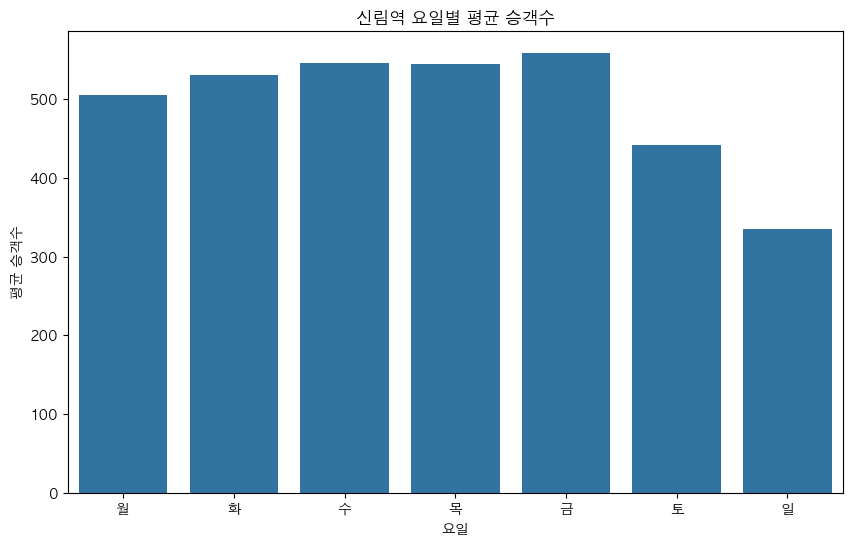

In [10]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x=요일별_평균.index, y=요일별_평균.values)
plt.title('신림역 요일별 평균 승객수')
plt.xlabel('요일')
plt.ylabel('평균 승객수')
plt.show()

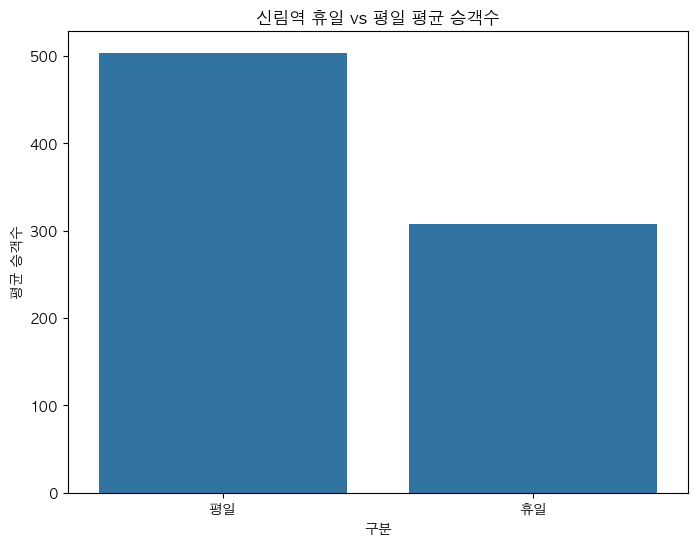

In [11]:
# 휴일/평일 구분하여 평균 승객수 계산
휴일평일_평균 = df.groupby('휴일여부')['승객수'].mean()

# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=휴일평일_평균.index.map({True: '휴일', False: '평일'}), y=휴일평일_평균.values)
plt.title('신림역 휴일 vs 평일 평균 승객수')
plt.xlabel('구분')
plt.ylabel('평균 승객수')
plt.show()


> 평일 주말보다는 압도적으로 많다

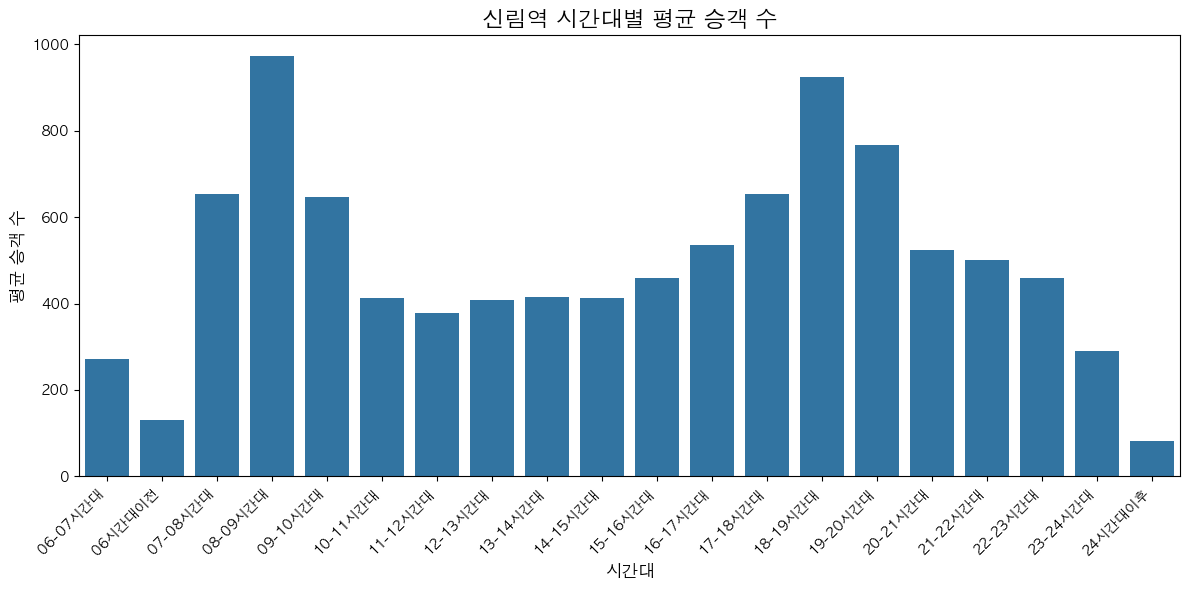

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시간대별 평균 승객 수 계산
시간대별_평균 = df.groupby('시간대')['승객수'].mean().sort_index()

# 그래프 설정
plt.figure(figsize=(12, 6))
sns.barplot(x=시간대별_평균.index, y=시간대별_평균.values)

# 그래프 꾸미기
plt.title('신림역 시간대별 평균 승객 수', fontsize=16)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('평균 승객 수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 그래프 표시
plt.show()


> 8~9시와 18~19시인 출퇴근시간대에 이용객이 앞도적으로 많다                     
: 신림역은 출퇴근하는 직장인이 많이 이용 한다.

#### 승객유형 분류
> 외국인 어린이 = 일어 어린이, 중국어 어린이, 영어 어린이로 분리

In [13]:
df['승객유형'].unique()

array(['일반', '어린이', '중고생', '청소년', '우대권', '외국어린이'], dtype=object)

In [14]:
def update_passenger_type(row):
    if row in ['일어 어린이', '중국어 어린이', '영어 어린이']:
        return '외국어린이'
    return row

df['승객유형'] = df['승객유형'].apply(update_passenger_type)


In [15]:
df['승객유형'].unique()

array(['일반', '어린이', '중고생', '청소년', '우대권', '외국어린이'], dtype=object)

#### 외국 어린이 데이터를 기반으로 외국어린이와 일반 승객의 비율을 통해 대략적인 외국인 비율을 시간대랑 요일대별로 추정

In [16]:
# 외국 어린이 데이터 필터링
foreign_children = df[df['승객유형'] == '외국 어린이']

foreign_children

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간,추정연령대


신림은 외국어린이가 승하차한 기록이 없음... 따라서 가족단위로 신림역쪽을 오지는 않음

> 승객유형중 '공통' = 무엇을 의미하는지 모르겠고, 데이터수도 적어 삭제, '외국어린이'는 0이라 전혀 필요없어 삭제

In [17]:
# '공통','외국어린이' 유형 제거 전 데이터 수 확인
print("제거 전 데이터 수:", len(df))

# '공통','외국어린이' 유형 제거
df = df[~df['승객유형'].isin(['공통', '외국 어린이'])]

# 제거 후 데이터 수 확인
print("제거 후 데이터 수:", len(df))

# 남은 승객 유형 확인
print("남은 승객 유형:", df['승객유형'].unique())


제거 전 데이터 수: 155520
제거 후 데이터 수: 155520
남은 승객 유형: ['일반' '어린이' '중고생' '청소년' '우대권' '외국어린이']


시간대별 패턴 활용하여 연령대 나누기                    
출퇴근 시간(07-09시, 18-20시): 주로 20~50대                     
늦은 밤 시간(22시 이후): 주로 20~30대                       
낮 시간(10-15시): 주로 주부층이나 60대 이상                 

In [18]:
import re

# 시간대에서 숫자(시간) 추출 함수
def extract_hour(time_slot):
    match = re.match(r"(\d{2})", time_slot)
    return int(match.group(1)) if match else None

# 시간대에서 숫자 추출 후 '시간' 열 생성
df['시간'] = df['시간대'].apply(extract_hour)

In [19]:
# 연령대 추정 함수
import random

def estimate_age_group_probabilities(hour):
    probabilities = {
        '20대~50대 직장인': 0,
        '20~30대 일반인': 0,
        '20대~60대 일반인 및 주부': 0,
        '20~30대 일반인 및 직장인': 0,
        '기타': 0
    }
    
    if 7 <= hour < 10:  # 7시부터 10시 전까지 (출근 시간 확장)
        probabilities['20대~50대 직장인'] = 0.7
        probabilities['20~30대 일반인'] = 0.09
        probabilities['20대~60대 일반인 및 주부'] = 0.05
        probabilities['20~30대 일반인 및 직장인'] = 0.11
        probabilities['기타'] = 0.05
    elif 18 <= hour < 20:  # 18시부터 20시 전까지 (퇴근 시간)
        probabilities['20대~50대 직장인'] = 0.7
        probabilities['20~30대 일반인'] = 0.09
        probabilities['20대~60대 일반인 및 주부'] = 0.05
        probabilities['20~30대 일반인 및 직장인'] = 0.11
        probabilities['기타'] = 0.05
    elif hour >= 21 or hour < 5:
        probabilities['20~30대 일반인'] = 0.6
        probabilities['20대~50대 직장인'] = 0.2
        probabilities['20~30대 일반인 및 직장인'] = 0.1
        probabilities['기타'] = 0.1
    elif 10 <= hour < 16:  # 10시부터 16시 전까지 (주간 시간대 조정)
        probabilities['20대~60대 일반인 및 주부'] = 0.5
        probabilities['20대~50대 직장인'] = 0.2
        probabilities['20~30대 일반인'] = 0.2
        probabilities['기타'] = 0.1
    elif 16 <= hour < 21:
        probabilities['20~30대 일반인 및 직장인'] = 0.4
        probabilities['20대~50대 직장인'] = 0.3
        probabilities['20~30대 일반인'] = 0.2
        probabilities['20대~60대 일반인 및 주부'] = 0.05
        probabilities['기타'] = 0.05
    else:
        probabilities['기타'] = 1.0
    
    return probabilities


for hour in range(24):
    probs = estimate_age_group_probabilities(hour)
    print(f"\n시간: {hour}시")
    for group, prob in probs.items():
        if prob > 0:
            print(f"{group}: {prob:.2f}")


시간: 0시
20대~50대 직장인: 0.20
20~30대 일반인: 0.60
20~30대 일반인 및 직장인: 0.10
기타: 0.10

시간: 1시
20대~50대 직장인: 0.20
20~30대 일반인: 0.60
20~30대 일반인 및 직장인: 0.10
기타: 0.10

시간: 2시
20대~50대 직장인: 0.20
20~30대 일반인: 0.60
20~30대 일반인 및 직장인: 0.10
기타: 0.10

시간: 3시
20대~50대 직장인: 0.20
20~30대 일반인: 0.60
20~30대 일반인 및 직장인: 0.10
기타: 0.10

시간: 4시
20대~50대 직장인: 0.20
20~30대 일반인: 0.60
20~30대 일반인 및 직장인: 0.10
기타: 0.10

시간: 5시
기타: 1.00

시간: 6시
기타: 1.00

시간: 7시
20대~50대 직장인: 0.70
20~30대 일반인: 0.09
20대~60대 일반인 및 주부: 0.05
20~30대 일반인 및 직장인: 0.11
기타: 0.05

시간: 8시
20대~50대 직장인: 0.70
20~30대 일반인: 0.09
20대~60대 일반인 및 주부: 0.05
20~30대 일반인 및 직장인: 0.11
기타: 0.05

시간: 9시
20대~50대 직장인: 0.70
20~30대 일반인: 0.09
20대~60대 일반인 및 주부: 0.05
20~30대 일반인 및 직장인: 0.11
기타: 0.05

시간: 10시
20대~50대 직장인: 0.20
20~30대 일반인: 0.20
20대~60대 일반인 및 주부: 0.50
기타: 0.10

시간: 11시
20대~50대 직장인: 0.20
20~30대 일반인: 0.20
20대~60대 일반인 및 주부: 0.50
기타: 0.10

시간: 12시
20대~50대 직장인: 0.20
20~30대 일반인: 0.20
20대~60대 일반인 및 주부: 0.50
기타: 0.10

시간: 13시
20대~50대 직장인: 0.20
20~30대 일반인: 0.20
20대~60대 일반인 및 주부: 0.50
기타

In [20]:
# 연령대 추정 후 새로운 열 생성
# df['추정연령대'] = df['시간'].apply(estimate_age_group)


NameError: name 'estimate_age_group' is not defined

In [21]:
# 시간대별, 연령대별 승객 수 합산
passenger_distribution = df.groupby(['시간대', '추정연령대'])['승객수'].sum().unstack(fill_value=0)


<Figure size 1200x800 with 0 Axes>

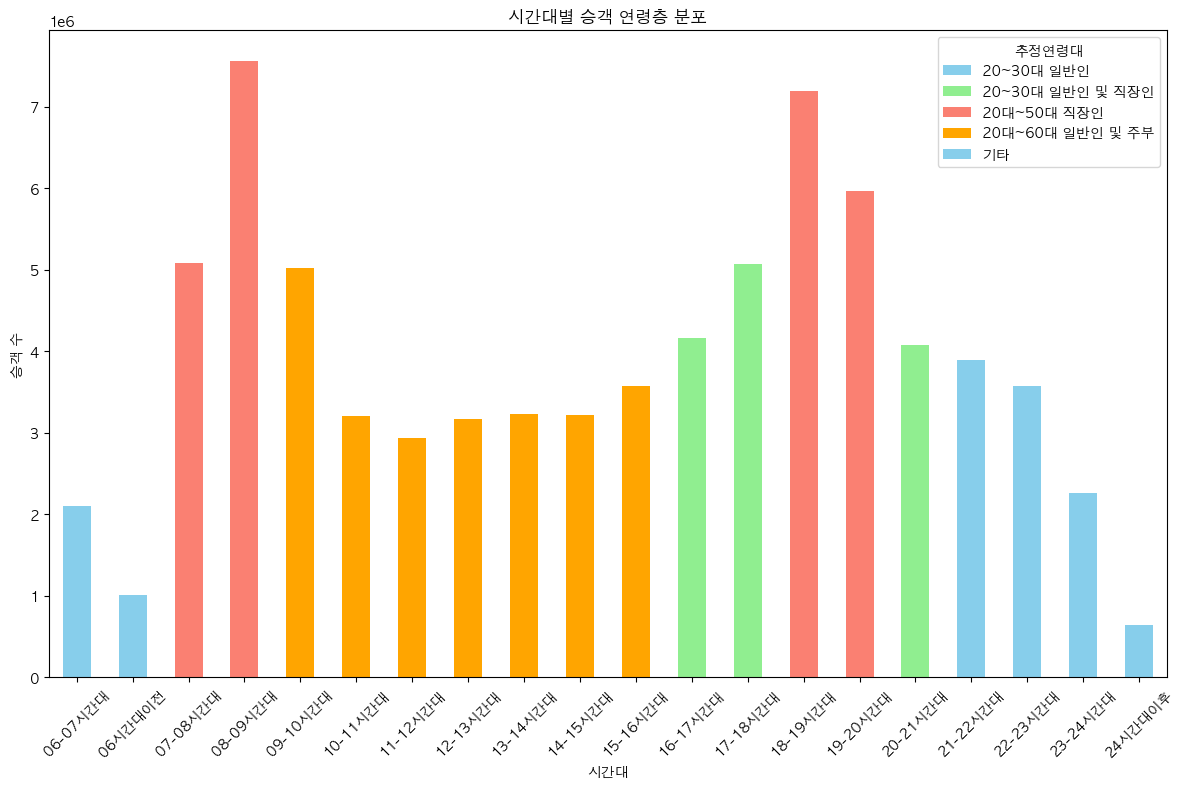

In [22]:
import matplotlib.pyplot as plt

# 스택형 막대 그래프 생성
plt.figure(figsize=(12, 8))
passenger_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('시간대별 승객 연령층 분포')
plt.xlabel('시간대')
plt.ylabel('승객 수')
plt.xticks(rotation=45)
plt.legend(title='추정연령대')
plt.tight_layout()
plt.show()


In [23]:
df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간,추정연령대
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0,1,False,2,수,6,기타
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0,1,False,2,수,6,기타
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0,1,False,2,수,6,기타


> 파일 저장

In [24]:
df.to_csv("../Data/신림역.csv", index=False, encoding='utf-8-sig')

In [25]:
df = pd.read_csv("../Data/신림역.csv", encoding='utf-8-sig')
df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간,추정연령대
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0,1,False,2,수,6,기타
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0,1,False,2,수,6,기타
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0,1,False,2,수,6,기타


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155520 entries, 0 to 155519
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   수송일자    155520 non-null  object 
 1   호선명     155520 non-null  float64
 2   역번호     155520 non-null  int64  
 3   역명      155520 non-null  object 
 4   승하차구분   155520 non-null  object 
 5   승객유형    155520 non-null  object 
 6   월       155520 non-null  int64  
 7   년       155520 non-null  int64  
 8   시간대     155520 non-null  object 
 9   승객수     155520 non-null  float64
 10  일       155520 non-null  int64  
 11  휴일여부    155520 non-null  bool   
 12  요일      155520 non-null  int64  
 13  요일_문자   155520 non-null  object 
 14  시간      155520 non-null  int64  
 15  추정연령대   155520 non-null  object 
dtypes: bool(1), float64(2), int64(6), object(7)
memory usage: 17.9+ MB


<Figure size 1200x600 with 0 Axes>

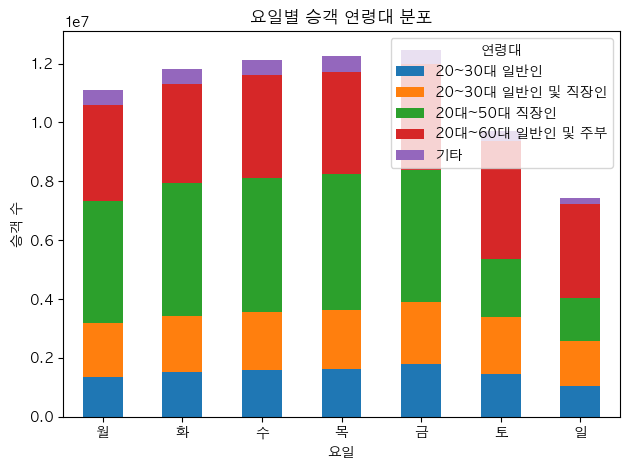

In [27]:
# 수송일자를 datetime 형식으로 변환
df['수송일자'] = pd.to_datetime(df['수송일자'])

# 요일 열 생성
df['요일'] = df['수송일자'].dt.dayofweek

# 나머지 코드는 동일
passenger_by_day = df.groupby(['요일', '추정연령대'])['승객수'].sum().unstack(fill_value=0)

요일_매핑 = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
passenger_by_day.index = passenger_by_day.index.map(요일_매핑)

plt.figure(figsize=(12, 6))
passenger_by_day.plot(kind='bar', stacked=True)
plt.title('요일별 승객 연령대 분포')
plt.xlabel('요일')
plt.ylabel('승객 수')
plt.legend(title='연령대')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [28]:
df.to_csv("../Data/신림역.csv", index=False, encoding='utf-8-sig')

In [29]:
df = pd.read_csv("../Data/신림역.csv", encoding='utf-8-sig')
df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간,추정연령대
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0,1,False,2,수,6,기타
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0,1,False,2,수,6,기타
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0,1,False,2,수,6,기타


<Figure size 1500x800 with 0 Axes>

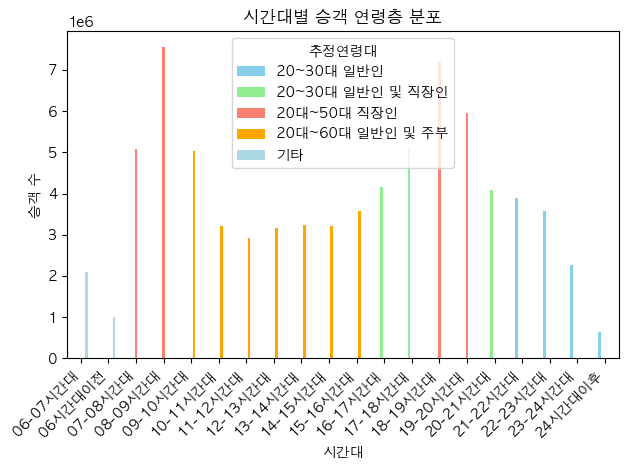

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 막대 그래프
plt.figure(figsize=(15, 8))
passenger_by_time = df.groupby(['시간대', '추정연령대'])['승객수'].sum().unstack()

colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightblue']
ax = passenger_by_time.plot(kind='bar', color=colors)
plt.title('시간대별 승객 연령층 분포')
plt.xlabel('시간대')
plt.ylabel('승객 수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='추정연령대')
plt.tight_layout()
plt.show()

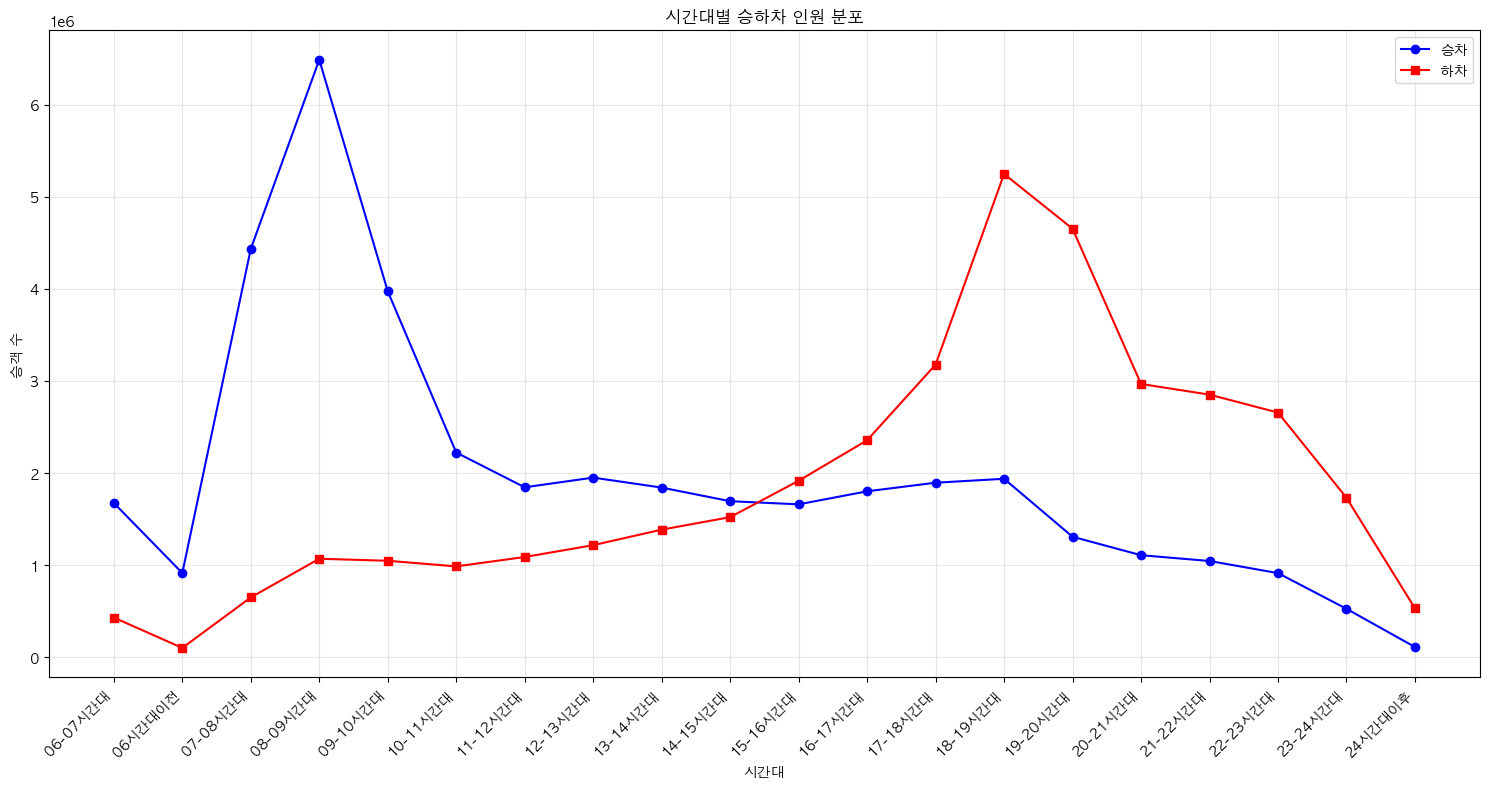

In [31]:
# 시간대별, 승하차 구분별 승객 수 집계
passenger_by_time_type = df.groupby(['시간대', '승하차구분'])['승객수'].sum().unstack()

# 선 그래프 생성
plt.figure(figsize=(15, 8))
plt.grid(True, alpha=0.3)

# 승차와 하차를 다른 색상과 마커로 표시
plt.plot(passenger_by_time_type.index, passenger_by_time_type['승차'], 
         marker='o', label='승차', color='blue')
plt.plot(passenger_by_time_type.index, passenger_by_time_type['하차'], 
         marker='s', label='하차', color='red')

plt.title('시간대별 승하차 인원 분포')
plt.xlabel('시간대')
plt.ylabel('승객 수')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


> 시간대별 승객 패턴
> 출퇴근 시간대 (07-09시, 17-19시)                       
20~50대가 가장 많이 이용                                    
출근 시간대와 퇴근 시간대에 뚜렷한 피크를 보임                                              
> 낮 시간대 (10-15시)
주부 및 60대가 주로 이용                                           
비교적 안정적인 승객 수 유지                               
> 저녁/심야 시간대 (20-24시)                                            
20~30대가 주요 이용층
시간이 늦어질수록 점진적 감소

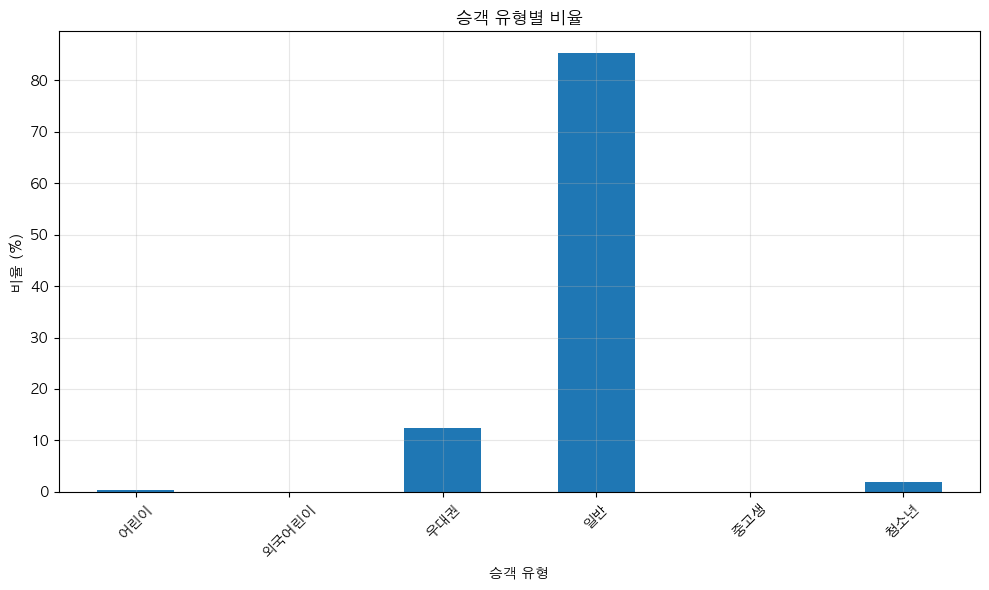

어린이: 0.28%
외국어린이: 0.00%
우대권: 12.43%
일반: 85.29%
중고생: 0.01%
청소년: 1.99%


In [32]:
# 승객 유형별 총 승객 수 계산
passenger_type_sum = df.groupby('승객유형')['승객수'].sum()

# 전체 대비 비율 계산
passenger_type_ratio = (passenger_type_sum / passenger_type_sum.sum() * 100).round(2)

# 시각화
plt.figure(figsize=(10, 6))
passenger_type_ratio.plot(kind='bar')
plt.title('승객 유형별 비율')
plt.xlabel('승객 유형')
plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 비율 출력
for type_, ratio in passenger_type_ratio.items():
    print(f"{type_}: {ratio:.2f}%")


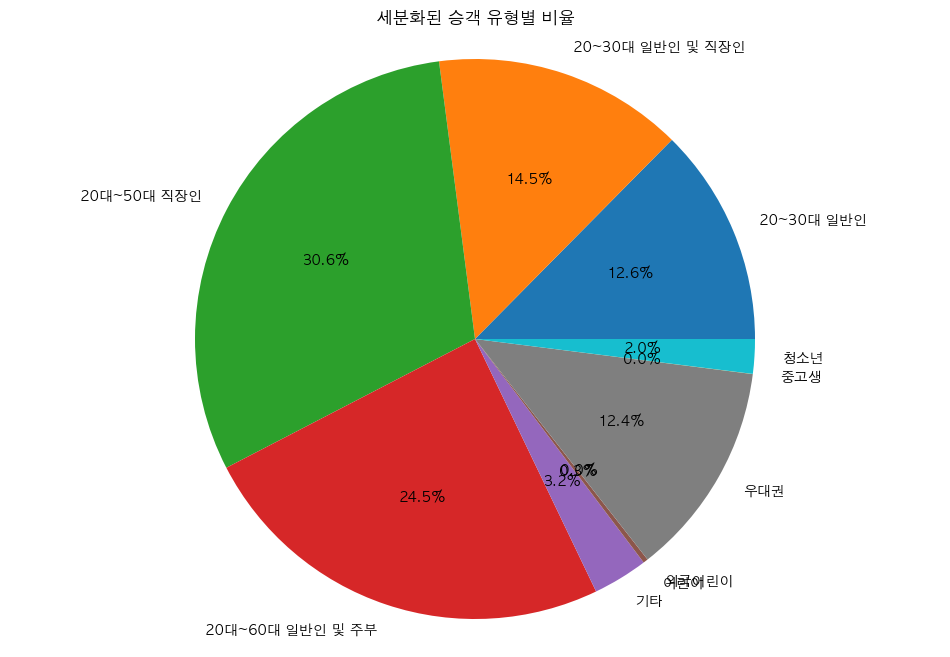

In [33]:
# 기존 승객 유형에서 '일반'을 제외한 비율 계산
other_types = passenger_type_ratio[passenger_type_ratio.index != '일반']

# '일반' 승객을 연령대별로 나눈 비율 계산
general_by_age = df[df['승객유형'] == '일반'].groupby('추정연령대')['승객수'].sum()
general_ratio = (general_by_age / passenger_type_sum.sum() * 100).round(2)

# 두 데이터 합치기
combined_ratio = pd.concat([general_ratio, other_types])

# 새로운 파이 차트 생성
plt.figure(figsize=(12, 8))
plt.pie(combined_ratio, labels=combined_ratio.index, autopct='%1.1f%%')
plt.title('세분화된 승객 유형별 비율')
plt.axis('equal')
plt.show()


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155520 entries, 0 to 155519
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   수송일자    155520 non-null  object 
 1   호선명     155520 non-null  float64
 2   역번호     155520 non-null  int64  
 3   역명      155520 non-null  object 
 4   승하차구분   155520 non-null  object 
 5   승객유형    155520 non-null  object 
 6   월       155520 non-null  int64  
 7   년       155520 non-null  int64  
 8   시간대     155520 non-null  object 
 9   승객수     155520 non-null  float64
 10  일       155520 non-null  int64  
 11  휴일여부    155520 non-null  bool   
 12  요일      155520 non-null  int64  
 13  요일_문자   155520 non-null  object 
 14  시간      155520 non-null  int64  
 15  추정연령대   155520 non-null  object 
dtypes: bool(1), float64(2), int64(6), object(7)
memory usage: 17.9+ MB


In [35]:
df_grouped = df.groupby(['수송일자', '승객유형', '월', '년', '시간대', '일', '휴일여부', '요일', '요일_문자', '시간', '추정연령대'])['승객수'].sum().reset_index()

In [36]:
df_grouped.head()

,수송일자,승객유형,월,년,시간대,일,휴일여부,요일,요일_문자,시간,추정연령대,승객수
0,2022-06-01,어린이,6,2022,06-07시간대,1,False,2,수,6,기타,0.0
1,2022-06-01,어린이,6,2022,06시간대이전,1,False,2,수,6,기타,0.0
2,2022-06-01,어린이,6,2022,07-08시간대,1,False,2,수,7,20대~50대 직장인,1.0
3,2022-06-01,어린이,6,2022,08-09시간대,1,False,2,수,8,20대~50대 직장인,19.0
4,2022-06-01,어린이,6,2022,09-10시간대,1,False,2,수,9,20대~60대 일반인 및 주부,20.0


In [37]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77200 entries, 0 to 77199
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수송일자    77200 non-null  object 
 1   승객유형    77200 non-null  object 
 2   월       77200 non-null  int64  
 3   년       77200 non-null  int64  
 4   시간대     77200 non-null  object 
 5   일       77200 non-null  int64  
 6   휴일여부    77200 non-null  bool   
 7   요일      77200 non-null  int64  
 8   요일_문자   77200 non-null  object 
 9   시간      77200 non-null  int64  
 10  추정연령대   77200 non-null  object 
 11  승객수     77200 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 6.6+ MB


In [38]:
df.to_csv("../Data/신림_추정연령대.csv", index=False, encoding='utf-8-sig')

In [39]:
df = pd.read_csv("../Data/신림_추정연령대.csv", encoding='utf-8-sig')
df.head()

,수송일자,호선명,역번호,역명,승하차구분,승객유형,월,년,시간대,승객수,일,휴일여부,요일,요일_문자,시간,추정연령대
0,2022-06-01,2.0,230,신림,승차,일반,6,2022,06시간대이전,801.0,1,False,2,수,6,기타
1,2022-06-01,2.0,230,신림,승차,어린이,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
2,2022-06-01,2.0,230,신림,승차,중고생,6,2022,06시간대이전,0.0,1,False,2,수,6,기타
3,2022-06-01,2.0,230,신림,승차,청소년,6,2022,06시간대이전,9.0,1,False,2,수,6,기타
4,2022-06-01,2.0,230,신림,승차,우대권,6,2022,06시간대이전,246.0,1,False,2,수,6,기타


In [416]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# 범주형 변수 인코딩
le_time = LabelEncoder()
df['시간대_encoded'] = le_time.fit_transform(df['시간대'])

le_type = LabelEncoder()
df['승객유형_encoded'] = le_type.fit_transform(df['승객유형'])

# 특성 및 타겟 정의
features = ['시간대_encoded', '월', '일', '휴일여부', '요일', '시간', '승객수']
target = '승객유형_encoded'

X = df[features]
y = df[target]

# 클래스 불균형 해결
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


In [417]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search_rf.fit(X_scaled, y_resampled)
print(f"최적 하이퍼파라미터: {grid_search_rf.best_params_}")


최적 하이퍼파라미터: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


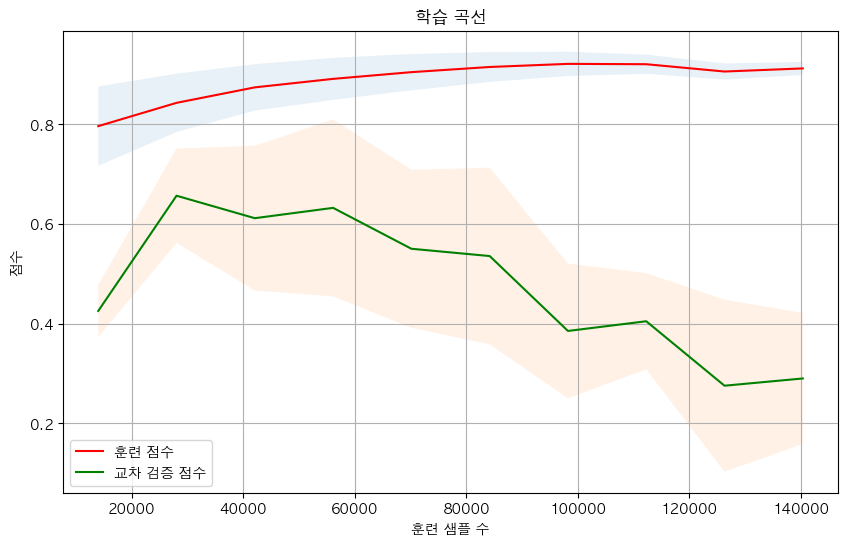

In [418]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='훈련 점수', color='red')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='교차 검증 점수', color='green')
    plt.fill_between(train_sizes,
                     np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                     np.mean(train_scores, axis=1) + np.std(train_scores, axis=1), alpha=0.1)
    plt.fill_between(train_sizes,
                     np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                     np.mean(test_scores, axis=1) + np.std(test_scores, axis=1), alpha=0.1)
    plt.title("학습 곡선")
    plt.xlabel("훈련 샘플 수")
    plt.ylabel("점수")
    plt.legend()
    plt.grid()
    plt.show()

# RandomForest로 학습 곡선 그리기
plot_learning_curve(RandomForestClassifier(random_state=42), X_scaled, y_resampled)


In [420]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 범주형 변수 인코딩
le_time = LabelEncoder()
df['시간대_encoded'] = le_time.fit_transform(df['시간대'])

le_type = LabelEncoder()
df['승객유형_encoded'] = le_type.fit_transform(df['승객유형'])

# 특성 및 타겟 정의
features = ['시간대_encoded', '월', '일', '휴일여부', '요일', '시간', '승객수']
target = '승객유형_encoded'

X = df[features]
y = df[target]

# 클래스 불균형 해결 (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [421]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝 (k 값 찾기)
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_scaled, y_train)

print(f"최적 k 값: {grid_search_knn.best_params_['n_neighbors']}")
best_knn_model = grid_search_knn.best_estimator_


최적 k 값: 9


In [422]:
from sklearn.metrics import classification_report

# 훈련 및 테스트 점수 계산
train_score_knn = best_knn_model.score(X_train_scaled, y_train)
test_score_knn = best_knn_model.score(X_test_scaled, y_test)

print(f"KNN - 훈련 점수: {train_score_knn:.4f}, 테스트 점수: {test_score_knn:.4f}")

# 테스트 데이터 예측 및 성능 평가
y_pred_knn = best_knn_model.predict(X_test_scaled)
print("\n분류 보고서:")
print(classification_report(y_test, y_pred_knn))


KNN - 훈련 점수: 0.6497, 테스트 점수: 0.4943

분류 보고서:
              precision    recall  f1-score   support

           0       0.21      0.28      0.24      5814
           1       0.48      0.92      0.63      5918
           2       0.80      0.66      0.72      5851
           3       1.00      0.87      0.93      5778
           4       0.20      0.12      0.15      5842
           5       0.26      0.11      0.15      5885

    accuracy                           0.49     35088
   macro avg       0.49      0.49      0.47     35088
weighted avg       0.49      0.49      0.47     35088



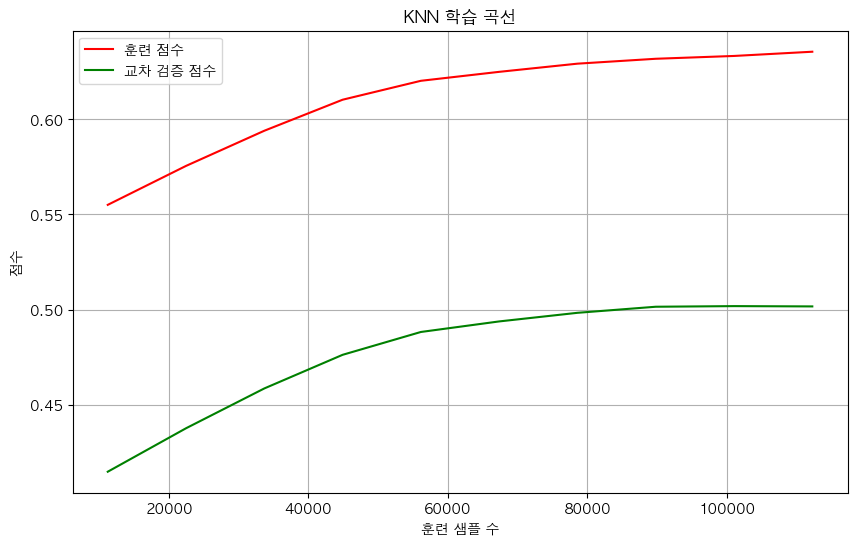

In [423]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='훈련 점수', color='red')
    plt.plot(train_sizes, test_scores_mean, label='교차 검증 점수', color='green')
    plt.title("KNN 학습 곡선")
    plt.xlabel("훈련 샘플 수")
    plt.ylabel("점수")
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(best_knn_model, X_train_scaled, y_train)
